In [1]:
# Import Statements

from detecto import core, visualize
import cv2
from matplotlib import pyplot as plt

# Helper Functions

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [2]:
model = core.Model.load('model_weights.pth', ['board'])

/home/hariraagavtr/.local/bin/.virtualenvs/cv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/hariraagavtr/.local/bin/.virtualenvs/cv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


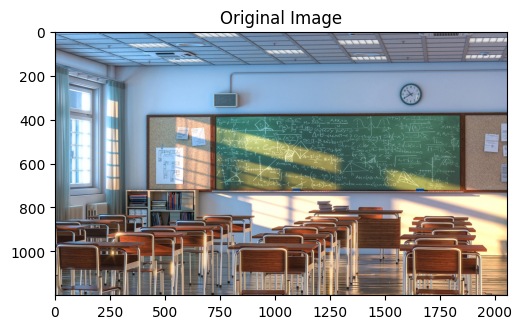

In [3]:
image = cv2.imread('/home/hariraagavtr/Recapyt/dataset/blackboard/blackboard37.jpg')
imshow('Original Image', image)

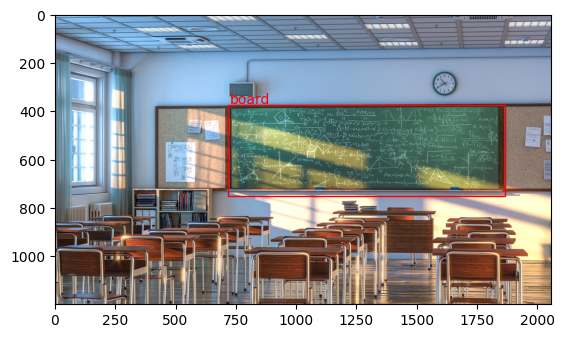

In [4]:
labels, boxes, scores = model.predict(image)
visualize.show_labeled_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), boxes[0], labels[0])

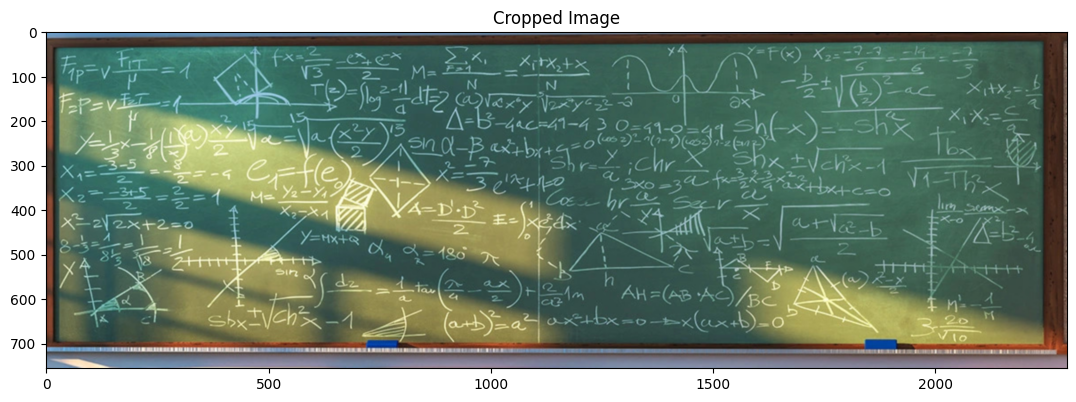

In [5]:
xmin, ymin, xmax, ymax = [int(i) for i in boxes[0]]
board = image[ymin: ymax, xmin: xmax]

upscaled = cv2.pyrUp(board)
imshow('Cropped Image', upscaled, 40)